In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import KBinsDiscretizer
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the dataset
csv_directory = os.getcwd()[:-8] + 'dataset\\'
csv_file_name = 'features_not_discretized.csv'
csv_path = os.path.join(csv_directory, csv_file_name)
data = pd.read_csv(csv_path, delimiter=';')
pd.set_option('display.max_columns', 61)
# pd.set_option('display.max_rows', 3537)
# print(data.shape)
data.head()

,post_id,post_name,version,tags_number,is_featured,score,created_at_day,created_at_daytime,launched_day,is_best_time_to_launch,is_best_day_to_launch,is_weekend,post_description,positive_description_sentiment,negative_description_sentiment,discretized_positive_description_score,discretized_negative_description_score,discretized_neutral_description_score,text_description_length,sentence_length_in_the_description,bullet_points_explicit_features,emoji_in_description,post_tagline,tagline_length,emoji_in_tagline,are_there_video,are_there_tweetable_images,are_there_gif_images,number_of_gif,offers,promo_discount_codes,are_there_questions,hunter_id,hunter_name,hunter_has_twitter,hunter_has_website,hunter_followers,hunter_apps_made,hunter_follows_up_on_comments,maker_id,maker_name,maker_has_twitter,maker_has_website,maker_followers,maker_started_comment_thread,maker_comment_ratio,thread_length,hunter_is_maker,maker_post_comment,maker_positive_comment,maker_negative_comment,discretized_maker_positive_comment_score,discretized_maker_negative_comment_score,discretized_maker_neutral_comment_score,others_post_comment,others_positive_comment,others_negative_comment,discretized_others_positive_comment_score,discretized_others_negative_comment_score,discretized_others_neutral_comment_score,topic
0,29143,Hotjar v1,1.0,4,Yes,2771,30/08/2018,28/07/2015 05:12:28,Tuesday,Yes,Yes,No,Hotjar v1 is a new and easy way to truly under...,2,-1,True,False,False,136,68,No,No,See how your visitors are really using your si...,59,No,No,Yes,No,0,No,No,Yes,36143,Stewart Rogers,Yes,Yes,2674,39,Yes,9151,Dr David Darmanin,Yes,Yes,808,No,0.0,21,No,NaN,1,-1,False,False,True,"After seven months of beta testing, Hotjar Ins...",4,-2,True,True,False,0
1,91504,F5Bot,1.0,6,Yes,313,12/10/2018,12/10/2018 00:00:00,Friday,No,No,No,F5Bot is a free service that emails you when y...,2,-1,True,False,False,205,102,No,No,Get emailed when your brand is mentioned on Re...,56,No,No,No,No,0,No,No,No,473726,Min Park,Yes,Yes,121,3,Yes,815976,Lewis Van Winkle,Yes,Yes,9,No,0.0,3,No,NaN,1,-1,False,False,True,Recently I found these https://www.hackernewsl...,4,-1,True,False,False,0
2,112580,Hims,1.0,2,Yes,442,10/09/2018,03/11/2017 03:02:00,Friday,Yes,No,No,Hims is a men's wellness brand built to help g...,2,-3,True,True,False,282,70,No,No,"Helping men prevent hair loss, erectile dysfun...",60,No,No,No,No,0,No,No,No,2,Ryan Hoover,Yes,No,52679,71,Yes,1069083,andrewdudum 🚀,Yes,Yes,196,No,0.0,1,No,NaN,1,-1,False,False,True,That is a beautiful site.,3,-1,True,False,False,0
3,119579,Deep Learning Platform (DLP),1.0,3,Yes,208,08/12/2018,08/12/2018 00:00:00,Saturday,No,No,Yes,Hello world!\n\nI am DLP for developers. You c...,2,-1,True,False,False,337,55,No,No,Software for DL application development withou...,55,No,Yes,No,No,0,No,No,No,1173498,Nasser Njikam,No,Yes,2,1,No,1173498,Nasser Njikam,No,Yes,2,No,0.0,3,Yes,NaN,1,-1,False,False,True,NaN,1,-1,False,False,True,2
4,121620,DLive,1.0,4,Yes,166,06/07/2018,06/07/2018 00:00:00,Friday,No,No,No,DLive is the first decentralized live streamin...,1,-2,False,True,False,194,96,No,No,Decentralized YouTube on the Steem blockchain,45,No,No,No,Yes,1,No,No,No,1190714,Md Amirul Islam,Yes,No,50,0,No,1273356,Charles Wayn,Yes,Yes,27,No,0.0,8,No,"@davecraige @rrhoover , Thanks for supporting ...",2,-2,True,True,False,"Thanks for the tip, @davecraige.\n\nThis is de...",3,-2,True,True,False,2


In [3]:
# The elbow method to determine the number of clusters
def elbow_method(column):
    # Instantiate the clustering model
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(1,11), timings=False) 
    # Plot visualizer
    plt.figure(figsize=(10, 5))
    visualizer.fit(column)  # Fit the data to the visualizer 
    return visualizer

In [4]:
def discretize(column, n_bins):
    disc = KBinsDiscretizer(n_bins, encode='ordinal', strategy='kmeans')
    disc.fit(column)
    disc.transform(column)
    return disc

In [5]:
def create_bins(values):
    bins = []
    for i in range(0, len(values)):
        bins.append(int(values[i]))
    return bins

In [6]:
def create_plot_directory(directory):
    os.mkdir(directory)

In [7]:
data_disc = data.copy()

In [8]:
plot_save_dir = os.getcwd()[:-8]+"features\\plot_figures"
if not os.path.isdir(plot_save_dir):
    create_plot_directory(plot_save_dir)

In [9]:
text_length = data_disc.iloc[:,18:19]
text_length.head(6)

,text_description_length
0,136
1,205
2,282
3,337
4,194
5,104


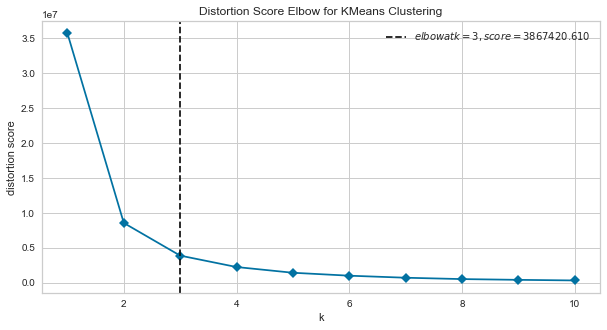

In [10]:
plotter = elbow_method(text_length)
plotter.show(plot_save_dir+"\\clustering-based discretization for Text Length")

In [11]:
disc = discretize(text_length, plotter.elbow_value_)
bins = create_bins(disc.bin_edges_[0])
print(bins)

[0, 151, 268, 422]


In [12]:
group_names = ['Short', 'Medium', 'Long']

text_length['text_description_length'] = pd.cut(text_length['text_description_length'], bins, labels = group_names, 
                                                include_lowest = True)
text_length.head(6)

,text_description_length
0,Short
1,Medium
2,Long
3,Long
4,Medium
5,Short


In [13]:
sentence_length = data_disc.iloc[:,19:20]
sentence_length.head(6)

,sentence_length_in_the_description
0,68
1,102
2,70
3,55
4,96
5,52


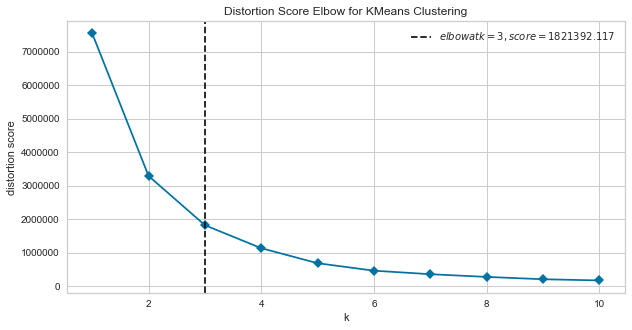

In [14]:
plotter = elbow_method(sentence_length)
plotter.show(plot_save_dir+"\\clustering-based discretization for Sentence Length")

In [15]:
disc = discretize(sentence_length, plotter.elbow_value_)
bins = create_bins(disc.bin_edges_[0])
print(bins)

[0, 97, 186, 349]


In [16]:
group_names = ['Short', 'Medium', 'Long']

sentence_length['sentence_length_in_the_description'] = pd.cut(sentence_length['sentence_length_in_the_description'], bins, 
                                                               labels = group_names, include_lowest = True)
sentence_length.head(6)

,sentence_length_in_the_description
0,Short
1,Medium
2,Short
3,Short
4,Short
5,Short


In [17]:
tagline_length = data_disc.iloc[:,23:24]
tagline_length.head(6)

,tagline_length
0,59
1,56
2,60
3,55
4,45
5,39


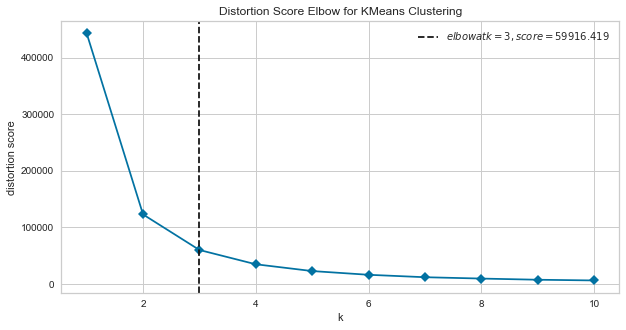

In [18]:
plotter = elbow_method(tagline_length)
plotter.show(plot_save_dir+"\\clustering-based discretization for Tagline Length")

In [19]:
disc = discretize(tagline_length, plotter.elbow_value_)
bins = create_bins(disc.bin_edges_[0])
print(bins)

[1, 33, 47, 60]


In [20]:
group_names = ['Short', 'Medium', 'Long']

tagline_length['tagline_length'] = pd.cut(tagline_length['tagline_length'], bins, labels = group_names, include_lowest = True)
tagline_length.head(6)

,tagline_length
0,Long
1,Long
2,Long
3,Long
4,Medium
5,Medium


In [21]:
hunter_followers = data_disc.iloc[:,36:37]
hunter_followers.head(6)

,hunter_followers
0,2674
1,121
2,52679
3,2
4,50
5,117


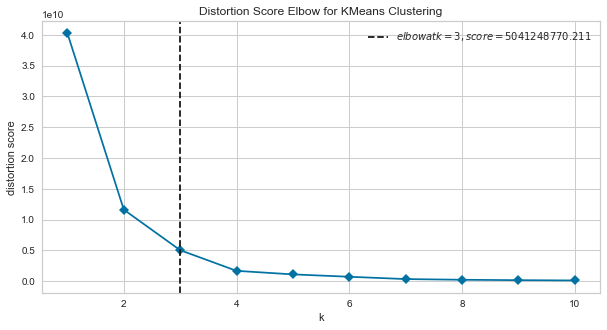

In [22]:
plotter = elbow_method(hunter_followers)
plotter.show(plot_save_dir+"\\clustering-based discretization for Hunter Followers")

In [23]:
disc = discretize(hunter_followers, plotter.elbow_value_)
bins = create_bins(disc.bin_edges_[0])
print(bins)

[0, 8516, 32385, 55968]


In [24]:
group_names = ['Low', 'Medium', 'High']

hunter_followers['hunter_followers'] = pd.cut(hunter_followers['hunter_followers'], bins, labels = group_names, 
                                              include_lowest = True)
hunter_followers.head(6)

,hunter_followers
0,Low
1,Low
2,High
3,Low
4,Low
5,Low


In [25]:
hunter_apps_made = data_disc.iloc[:,37:38]
hunter_apps_made.head(6)

,hunter_apps_made
0,39
1,3
2,71
3,1
4,0
5,4


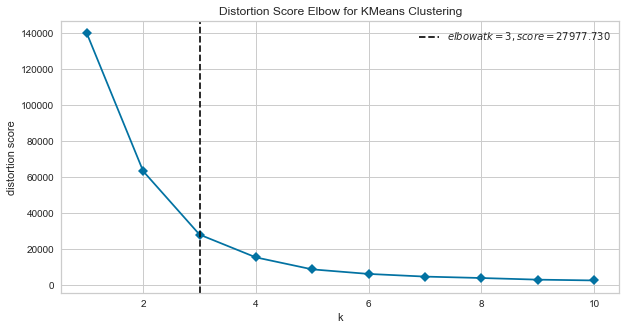

In [26]:
plotter = elbow_method(hunter_apps_made)
plotter.show(plot_save_dir+"\\clustering-based discretization for Hunter Apps Made")

In [27]:
disc = discretize(hunter_apps_made, plotter.elbow_value_)
bins = create_bins(disc.bin_edges_[0])
print(bins)

[0, 8, 43, 99]


In [28]:
group_names = ['Low', 'Medium', 'High']

hunter_apps_made['hunter_apps_made'] = pd.cut(hunter_apps_made['hunter_apps_made'], bins, labels = group_names, 
                                              include_lowest = True)
hunter_apps_made.head(6)

,hunter_apps_made
0,Medium
1,Low
2,High
3,Low
4,Low
5,Low


In [29]:
maker_followers = data_disc.iloc[:,43:44]
maker_followers.head(6)

,maker_followers
0,808
1,9
2,196
3,2
4,27
5,16


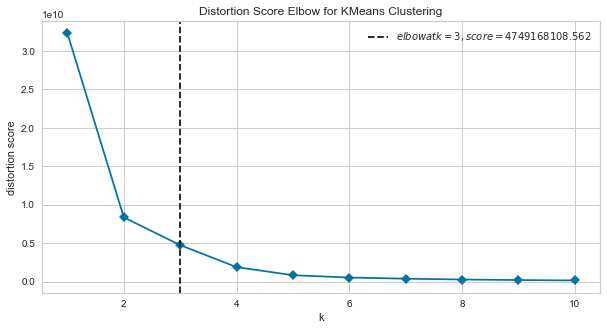

In [30]:
plotter = elbow_method(maker_followers)
plotter.show(plot_save_dir+"\\clustering-based discretization for Maker Followers")

In [31]:
disc = discretize(maker_followers, plotter.elbow_value_)
bins = create_bins(disc.bin_edges_[0])
print(bins)

[0, 20557, 72984, 105068]


In [32]:
group_names = ['Low', 'Medium', 'High']

maker_followers['maker_followers'] = pd.cut(maker_followers['maker_followers'], bins, labels = group_names, include_lowest = True)
maker_followers.head(6)

,maker_followers
0,Low
1,Low
2,Low
3,Low
4,Low
5,Low


In [33]:
topic = data_disc.iloc[:,60:61]
topic.head(6)

,topic
0,0
1,0
2,0
3,2
4,2
5,1


In [34]:
topic['topic'] = topic['topic'].map({0: 'web development', 1:'creativity', 2:'community'})
topic.head(6)

,topic
0,web development
1,web development
2,web development
3,community
4,community
5,creativity


In [35]:
# Updating table inserting discretized values for text length, sentence length, tagline length, hunter_followers, 
# hunter_apps_made, maker_followers and topic column
data_disc['text_description_length'] = text_length
data_disc['sentence_length_in_the_description'] = sentence_length
data_disc['tagline_length'] = tagline_length
data_disc['hunter_followers'] = hunter_followers
data_disc['hunter_apps_made'] = hunter_apps_made
data_disc['maker_followers'] = maker_followers
data_disc['topic'] = topic
csv_file_name = 'features.csv'
csv_path = os.path.join(csv_directory, csv_file_name)
data_disc.to_csv(csv_path, sep=';', index=False)

In [36]:
mydata = pd.read_csv(csv_path, delimiter=';')
pd.set_option('display.max_columns', 61)
mydata.head()

,post_id,post_name,version,tags_number,is_featured,score,created_at_day,created_at_daytime,launched_day,is_best_time_to_launch,is_best_day_to_launch,is_weekend,post_description,positive_description_sentiment,negative_description_sentiment,discretized_positive_description_score,discretized_negative_description_score,discretized_neutral_description_score,text_description_length,sentence_length_in_the_description,bullet_points_explicit_features,emoji_in_description,post_tagline,tagline_length,emoji_in_tagline,are_there_video,are_there_tweetable_images,are_there_gif_images,number_of_gif,offers,promo_discount_codes,are_there_questions,hunter_id,hunter_name,hunter_has_twitter,hunter_has_website,hunter_followers,hunter_apps_made,hunter_follows_up_on_comments,maker_id,maker_name,maker_has_twitter,maker_has_website,maker_followers,maker_started_comment_thread,maker_comment_ratio,thread_length,hunter_is_maker,maker_post_comment,maker_positive_comment,maker_negative_comment,discretized_maker_positive_comment_score,discretized_maker_negative_comment_score,discretized_maker_neutral_comment_score,others_post_comment,others_positive_comment,others_negative_comment,discretized_others_positive_comment_score,discretized_others_negative_comment_score,discretized_others_neutral_comment_score,topic
0,29143,Hotjar v1,1.0,4,Yes,2771,30/08/2018,28/07/2015 05:12:28,Tuesday,Yes,Yes,No,Hotjar v1 is a new and easy way to truly under...,2,-1,True,False,False,Short,Short,No,No,See how your visitors are really using your si...,Long,No,No,Yes,No,0,No,No,Yes,36143,Stewart Rogers,Yes,Yes,Low,Medium,Yes,9151,Dr David Darmanin,Yes,Yes,Low,No,0.0,21,No,NaN,1,-1,False,False,True,"After seven months of beta testing, Hotjar Ins...",4,-2,True,True,False,web development
1,91504,F5Bot,1.0,6,Yes,313,12/10/2018,12/10/2018 00:00:00,Friday,No,No,No,F5Bot is a free service that emails you when y...,2,-1,True,False,False,Medium,Medium,No,No,Get emailed when your brand is mentioned on Re...,Long,No,No,No,No,0,No,No,No,473726,Min Park,Yes,Yes,Low,Low,Yes,815976,Lewis Van Winkle,Yes,Yes,Low,No,0.0,3,No,NaN,1,-1,False,False,True,Recently I found these https://www.hackernewsl...,4,-1,True,False,False,web development
2,112580,Hims,1.0,2,Yes,442,10/09/2018,03/11/2017 03:02:00,Friday,Yes,No,No,Hims is a men's wellness brand built to help g...,2,-3,True,True,False,Long,Short,No,No,"Helping men prevent hair loss, erectile dysfun...",Long,No,No,No,No,0,No,No,No,2,Ryan Hoover,Yes,No,High,High,Yes,1069083,andrewdudum 🚀,Yes,Yes,Low,No,0.0,1,No,NaN,1,-1,False,False,True,That is a beautiful site.,3,-1,True,False,False,web development
3,119579,Deep Learning Platform (DLP),1.0,3,Yes,208,08/12/2018,08/12/2018 00:00:00,Saturday,No,No,Yes,Hello world!\n\nI am DLP for developers. You c...,2,-1,True,False,False,Long,Short,No,No,Software for DL application development withou...,Long,No,Yes,No,No,0,No,No,No,1173498,Nasser Njikam,No,Yes,Low,Low,No,1173498,Nasser Njikam,No,Yes,Low,No,0.0,3,Yes,NaN,1,-1,False,False,True,NaN,1,-1,False,False,True,community
4,121620,DLive,1.0,4,Yes,166,06/07/2018,06/07/2018 00:00:00,Friday,No,No,No,DLive is the first decentralized live streamin...,1,-2,False,True,False,Medium,Short,No,No,Decentralized YouTube on the Steem blockchain,Medium,No,No,No,Yes,1,No,No,No,1190714,Md Amirul Islam,Yes,No,Low,Low,No,1273356,Charles Wayn,Yes,Yes,Low,No,0.0,8,No,"@davecraige @rrhoover , Thanks for supporting ...",2,-2,True,True,False,"Thanks for the tip, @davecraige.\n\nThis is de...",3,-2,True,True,False,community
